<a href="https://colab.research.google.com/github/sashamontgomery/Neur-265/blob/main/notebooks/Plotting_02_24_26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotting

This notebook will build on our previous Cell Types notebook to help us plot the data that we've pulled from the Allen Cell Types database.

### By the end of this notebook, you'll be able to:

* Create plots using `matplotlib.pyplot`
* Manipulate aspects of plots
* Create bar, box, and scatter plots from the Allen Cell Types metrics


## Step One: Get comfortable with our plotting tools

First, let's get set up for plotting by importing the necessary tool boxes.

In [4]:
# Tell Jupyter to plot our plots inline
%matplotlib inline

# Import matplotlib and "pyplot" module
# plt is the common abbreviation for matplotlib's pyplot module
import matplotlib as mpl
import matplotlib.pyplot as plt

*First*, let's create a random line using our favorite scientific computing toolbox, and show how we can use the `matplotlib.pyplot` module to plot it.

Useful functions:

* `plt.plot()` create a plot from a list, array, pandas series, etc.
* `plt.show()` show the plot (not strictly necessary in Jupyter, necessary in other IDEs)
* `plt.xlabel()` and `plt.ylabel()` change x and y labels
* `plt.title()` add a title

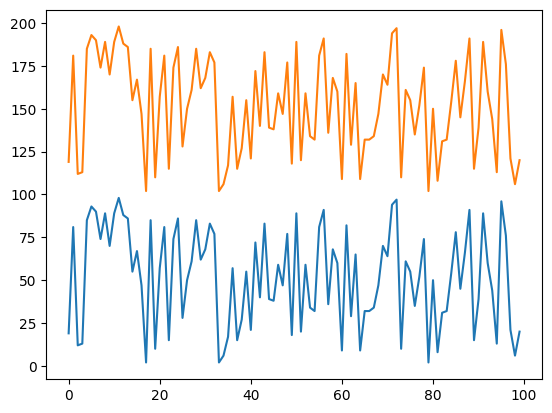

In [6]:
import numpy as np

# Generate a random line from 1 to 100 with 100 values
random_line = np.random.randint(1,100,100)
random_line

random_line_2 = random_line + 100

plt.plot(random_line)
plt.plot(random_line_2)
plt.show()

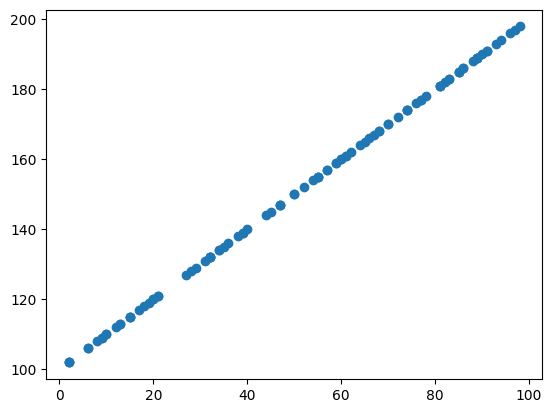

In [7]:
# Create a scatter plot to show the relationship between the two lines

plt.scatter(random_line,random_line_2)
plt.show()


The `plt.hist()` function works really similarly.

><b>Task:</b> In the cell below:
1. Generate a random list of 100 data points from a standard normal distribution (Hint: Use <code>np.random.standard_normal()</code>)
2. Plot a histogram of the data.

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([0.87221474, 0.97221474, 1.07221474, 1.17221474, 1.27221474,
        1.37221474, 1.47221474, 1.57221474, 1.67221474, 1.77221474,
        1.87221474]),
 <BarContainer object of 10 artists>)

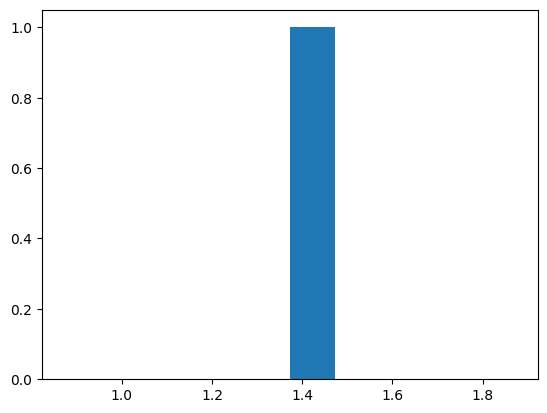

In [19]:
# Your code here
randomdata = np.random.standard_normal()
plt.hist(randomdata)

We can also set up multiple subplots on the same figure using `subplots`. This also creates separate **axes** (really, separate plots) which we can access and manipulate, particularly if you are plotting multiple lines. It's common to use the `subplots` command for easier access to axis attributes.

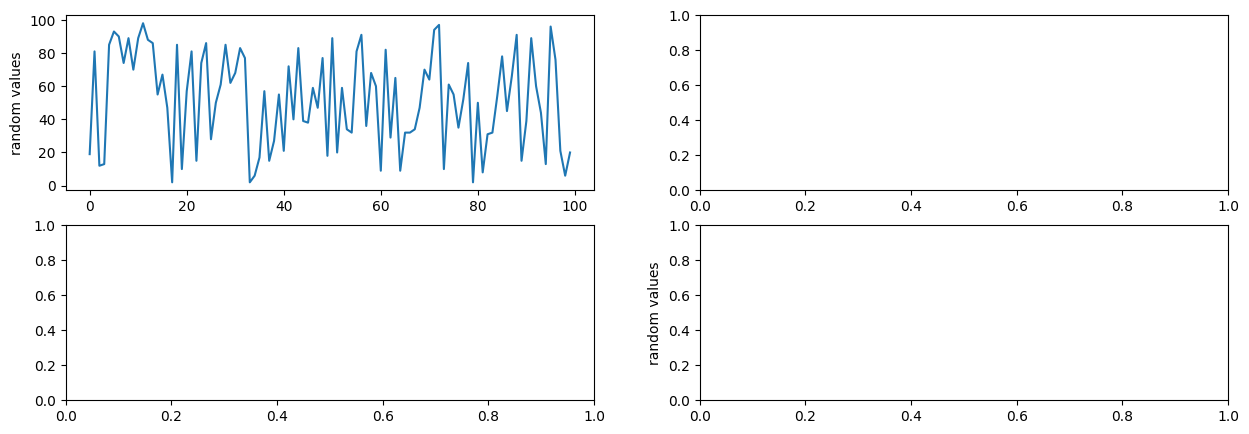

In [24]:
fig, ax = plt.subplots(2,2,figsize=(15,5))
ax[0,0].plot(random_line)
ax[0,0].set_ylabel('random values')

plt.ylabel('random values')
plt.show()

><b>Task:</b> Plot your second <code>random_line_2</code> in the upper-right hand subplot, put a scatter plot with <code>random_line</code> on the x-axis and <code>random_line_2</code> on the y-axis in the lower-left hand subplot, and put a histogram of your normally-distributed random data in the lower-right hand subplot.

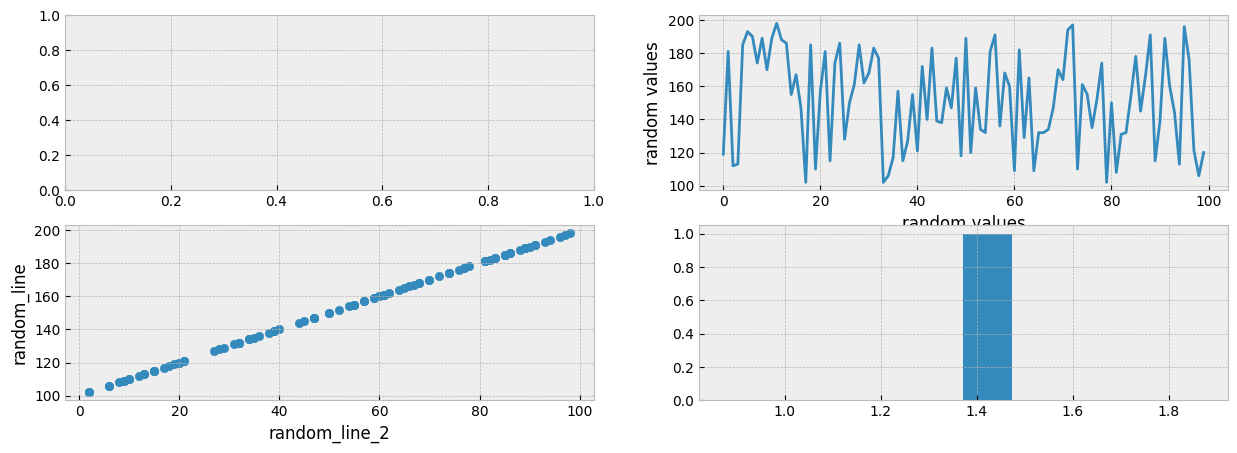

In [53]:
# Your code here
fig, ax = plt.subplots(2,2,figsize=(15,5))
ax[0,1].plot(random_line_2)
ax[0,1].set_ylabel('random values')
ax[0,1].set_xlabel('random values')
ax[1,0].set_ylabel('random_line')
ax[1,0].set_xlabel('random_line_2')
ax[1,0].scatter(random_line,random_line_2)
plt.hist(randomdata)
plt.show()

There are *many, many* different aspects of a figure that you could manipulate (and spend a lot of time manipulating).

Style guides help with this a bit, they set a few good defaults. Below, we are setting figure parameters, and choosing a figure style (see all styles [here](https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html), or how to create your own style [here](https://matplotlib.org/tutorials/introductory/customizing.html).).)

You can test how these parameters change our plots by going back and re-plotting the plots above.


><b>Task:</b> Use different figure styles to change the appearance of your scatter plot

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


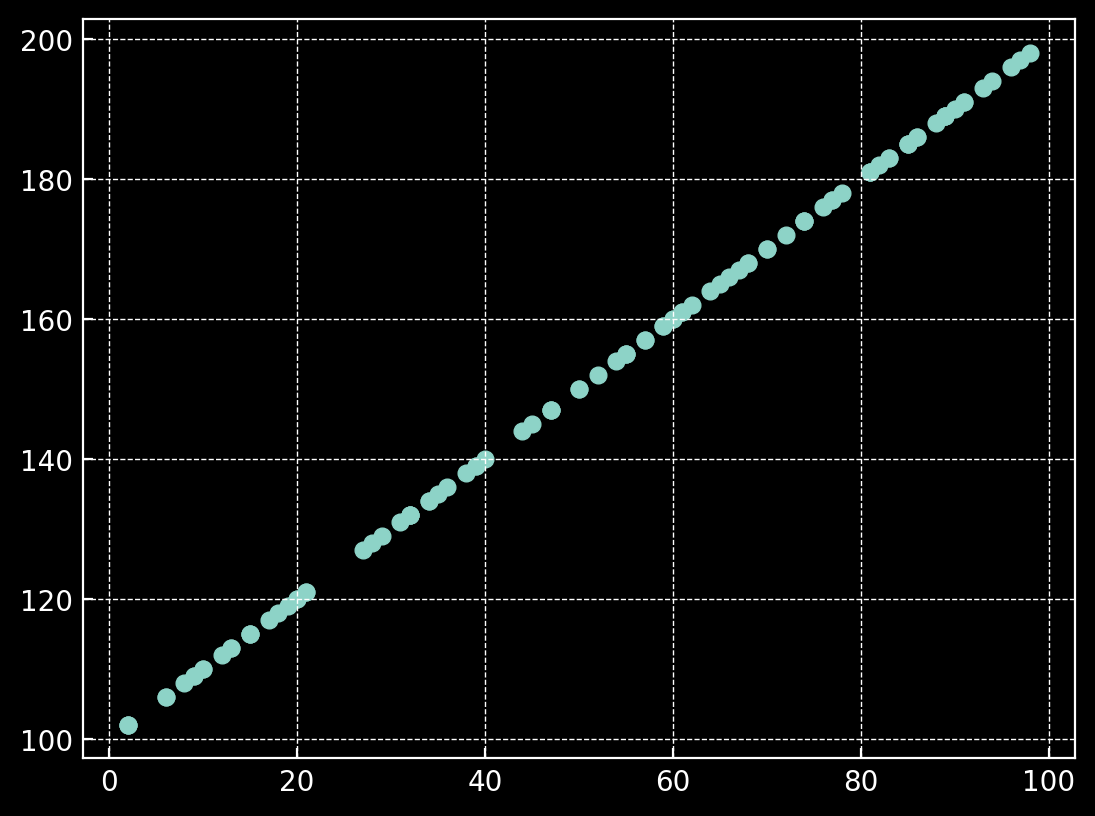

In [59]:
# Set the figure "dots per inch" to be higher than the default (optional, based on your personal preference)
mpl.rcParams['figure.dpi'] = 200

# (Optional) Choose a figure style
print(plt.style.available)
plt.style.use('dark_background')
plt.scatter(random_line,random_line_2)

## Step Two: Get Patch Seq data

Import the variable <code>patch_seq_expanded_v2</code> from our GitHub repo. Import it as a Pandas dataframe called <code>patch_seq</code>

In [71]:
# Your code here!

import pandas as pd
url = "https://raw.githubusercontent.com/hallockh/neur_265_spring2026/refs/heads/main/data/patch_seq_expanded_v2.csv"
patch_seq = pd.read_csv(url)

## Step Three: Plot our ephys metrics

Our plotting goal for today is to compare ISI data between different types of interneurons in the mouse visual cortex. We have two options: we could split the dataframe into different marker genes (as you did in our previous notebook), or use our plotting tools to plot the data separately.

Usefully, Pandas has some [built-in plotting tools](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) to interact with Matplotlib, so we can actually just tell it to plot based on marker gene.

First, let's plot the **number of cells** that we have for each of the marker genes. Recall that we can access a column by using the bracket notation, with the column name in parentheses in the bracket.

`value_counts()` is a method that will count up the number of instances of each value.

`plot()` is a Pandas method that will plot, depending on the `kind` argument you give it.

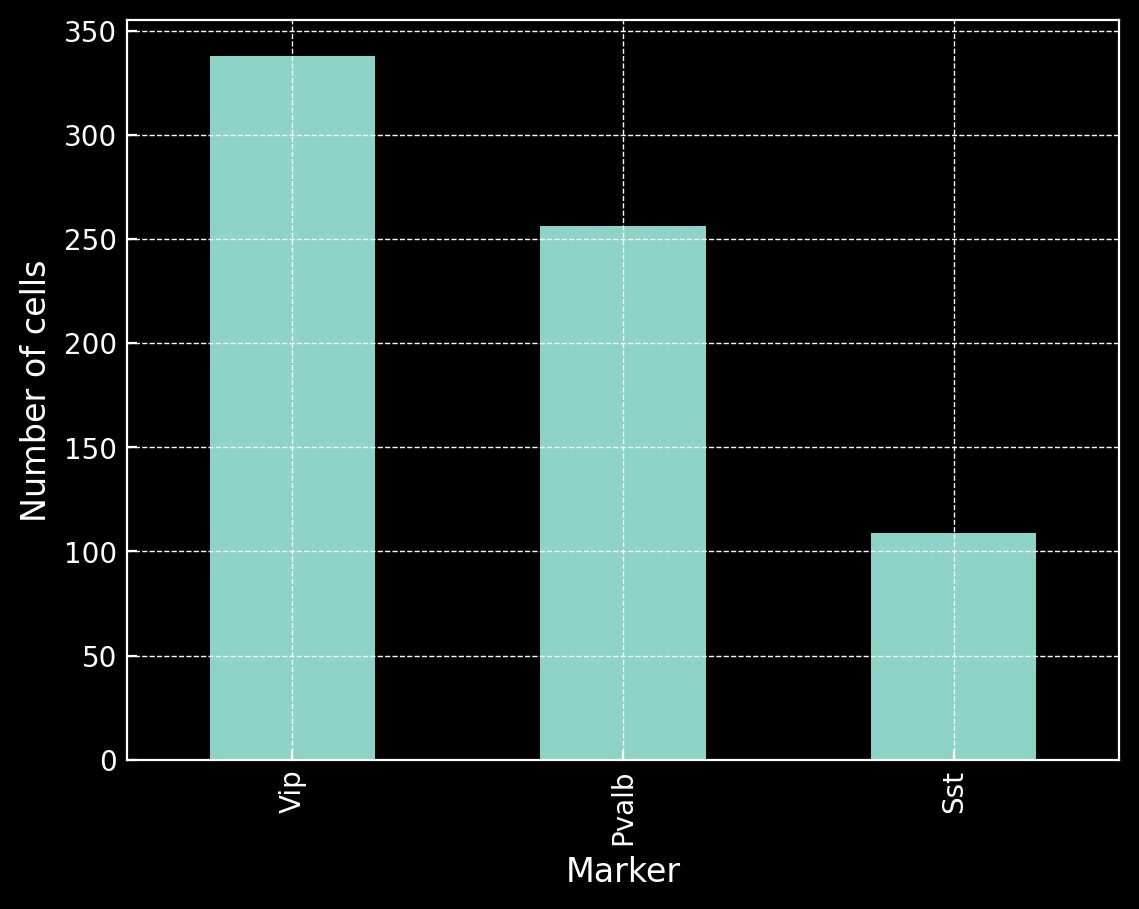

In [122]:
# For the different values in dendrite_type column, get the value_counts, and plot as a bar plot.
patch_seq['Marker'].value_counts().plot(kind='bar')

# Add y label
plt.ylabel('Number of cells')

# Show the plot!
plt.show()

><b>Task:</b> Try plotting different features of the dataset (hint: look at the column headers). Try plotting these features using different styles (hint: check out the link in the *Markdown Cell* above to see different <code>kind</code> methods).

Our dataframe contains a couple of different metrics on these cells. Let's remind ourselves what we have available by accessing the `columns` attribute.

In [91]:
patch_seq.columns

Index(['ISI', 'Fast_Trough', 'Marker'], dtype='object')

Let's choose the ISI column and plot a boxplot. We'll do this with a call to pyplot ([examples here](https://matplotlib.org/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py)).

**Note**: This is actually *slightly* easier by using the methods of our [dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html), but it's a little bit more difficult to work with separate objects of the plot afterwards. Knowing how to create plots with a call to `plt.boxplots()` is a more universal way to work with various types of data structures, including dataframes, arrays, lists, etc.

><b>Task:</b> Create a boxplot that compares *Sst*, *Pvalb*, and *Vip* interneurons with the following steps:
1. Save three different dataframes from your <code>patch_seq</code> variable by filtering for 'Sst', 'Pvalb', and 'Vip'. You can filter dataframes by using the syntax <code>dataframe[dataframe['column_name'] == 'variable_name']</code>
2. Assign the 'Fast Trough' of each of your 'Sst', 'Pvalb', and 'Vip' dataframes to three different pandas series objects (like a dataframe, but only one dimension). For example, <code>sst_ft = sst_data['Fast_Trough']</code>
3. Create a list of your three different pandas series, and assign it to <code>data</code>. You can accomplish this by using the <code>series.tolist()</code> function.
4. Create a boxplot by using <code>plt.boxplot()</code> and don't forget to show it!
5. Once you're sure the boxplot is working, add a few lines of code to change the xticks, as well as add x and y labels ([see documentation here](https://matplotlib.org/api/axes_api.html#axis-limits)).

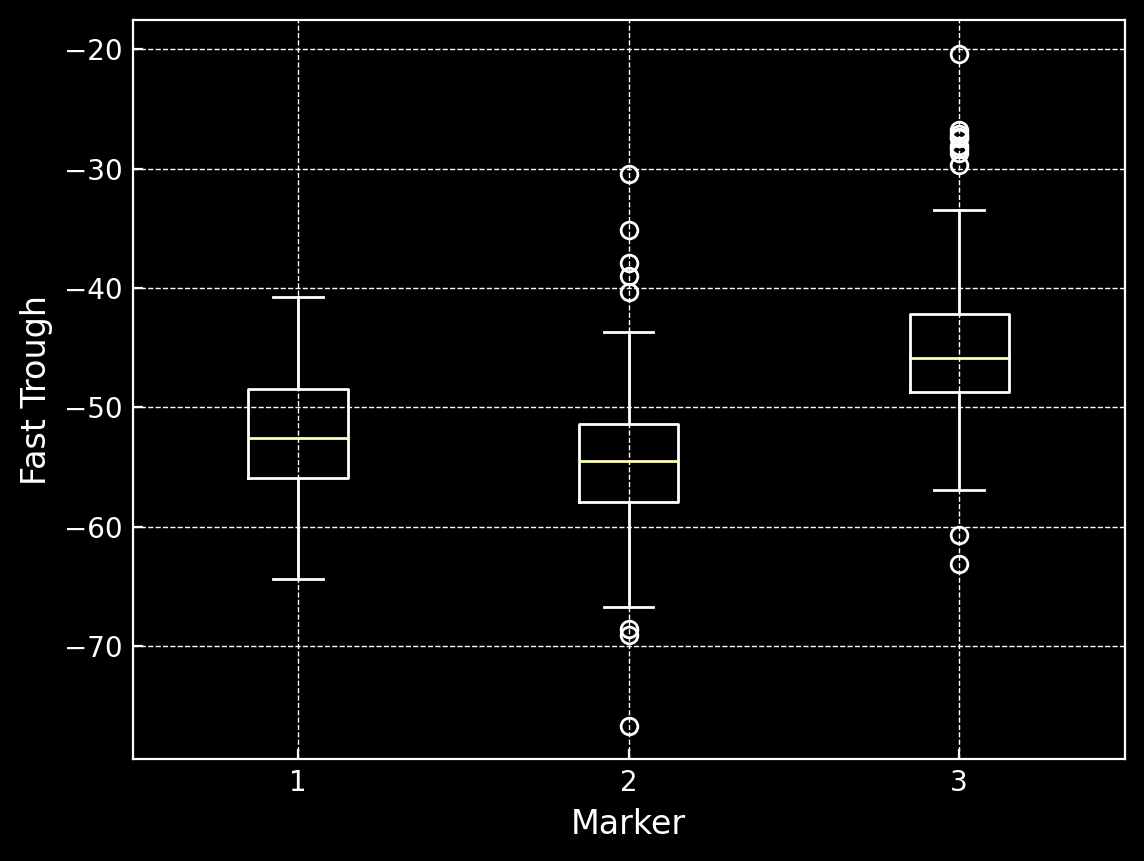

In [175]:
# Your code here!
sst_data = patch_seq[patch_seq['Marker'] == 'Sst']
pvalb_data = patch_seq[patch_seq['Marker'] == 'Pvalb']
vip_data = patch_seq[patch_seq['Marker'] == 'Vip']

sst_ft = sst_data['Fast_Trough']
pvalb_ft = pvalb_data['Fast_Trough']
vip_ft = vip_data['Fast_Trough']

data = [sst_ft, pvalb_ft, vip_ft]

plt.boxplot(data)
plt.ylabel('Fast Trough')
plt.xlabel('Marker')
plt.show()

##ISI is the independent variable that is being compared

### Plot this data as a scatterplot

The built-in scatterplot methods in Pandas are bit clunky, so we'll use `plt.scatter()` instead ([documentation here](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html#matplotlib.pyplot.scatter)).

The syntax for a scatter plot is slightly longer if we want to label multiple groups with different colors. We'll actually loop through groups in order to create our plot:

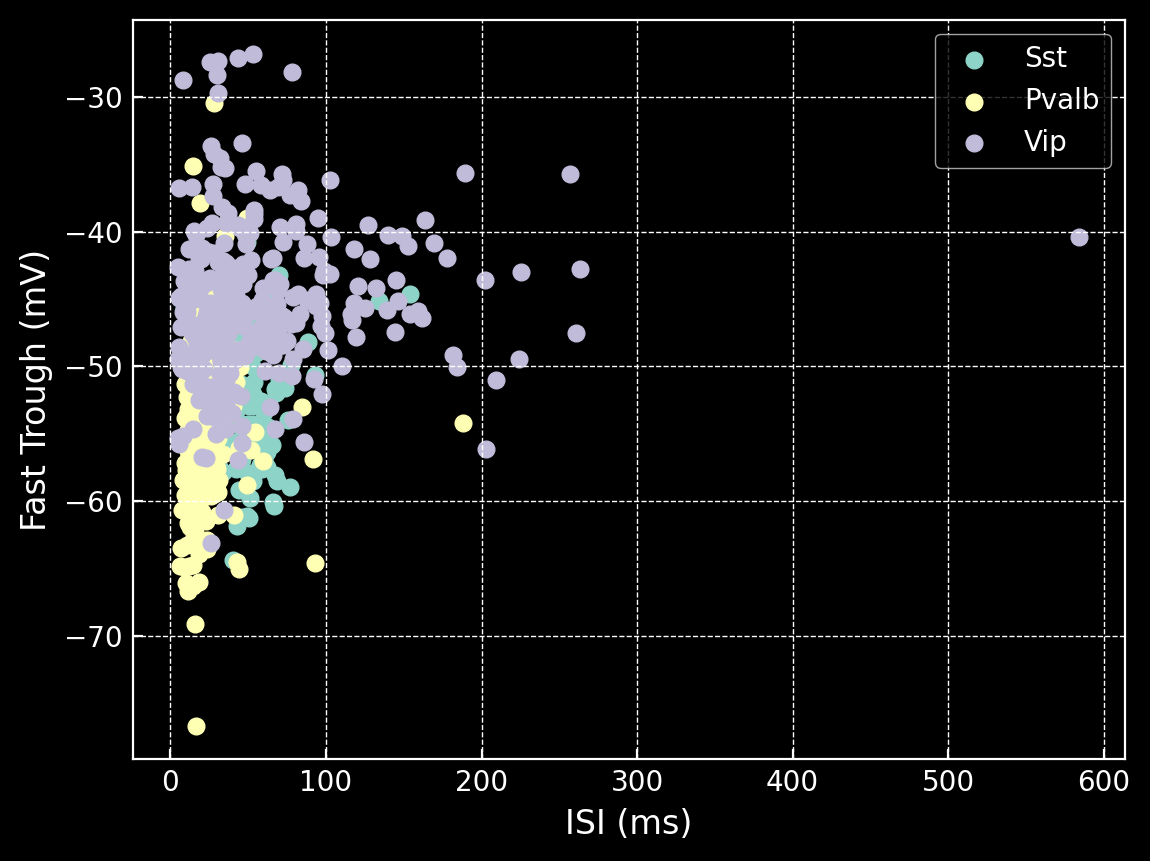

In [131]:
# Get possible interneuron types
marker_types = patch_seq['Marker'].unique()

fig = plt.figure()

for m_type in marker_types:

    df = patch_seq[patch_seq['Marker'] == m_type]

    plt.scatter(df['ISI'],
                df['Fast_Trough'],
                label=m_type)

plt.ylabel("Fast Trough (mV)")
plt.xlabel("ISI (ms)")
plt.legend(loc='best')

plt.show()